## Imports

In [1]:
from langgraph.graph import StateGraph, START, END

from langchain_groq.chat_models import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

True

## Prompt Chaining
In prompt chaining, we chain multiple LLM calls and then get final output. We can also have some conditional checks as well.

In [15]:
class BlogState(TypedDict):
    topic: str
    outline: str
    blog: str
    score: int # if the blog is as per the outline

LLM = ChatGroq(model="llama-3.1-8b-instant")

In [16]:
def gen_outline(state: BlogState) -> BlogState:
    topic = state['topic']
    prompt = f""" Create a ddetailed outline for a blog based on given topic - {topic} """
    # pass the prompt to the LLM
    outline = LLM.invoke(prompt).content
    # update the state
    state['outline'] = outline
    return state

def gen_blog(state: BlogState) -> BlogState:
    topic = state['topic']
    outline = state['outline']
    prompt = f""" Generate a detailed blog based on topic - {topic} and outline \n{outline} """
    # pass the prompt to the LLM
    blog = LLM.invoke(prompt).content
    # update the state
    state['blog'] = blog
    return state

def eval_blog(state: BlogState) -> BlogState:
    blog = state['blog']
    outline = state['outline']
    prompt = f""" You are an expert blog evaluator. Evaluate the blog below based on the outline provided 
    and return only an integer score out of 10.\nOutline: {outline}\nBlog: {blog} \nSTRICLY RETURN ONLY THE INTEGER SCORE. """
    score = int(LLM.invoke(prompt).content)
    state['score'] = score
    return state

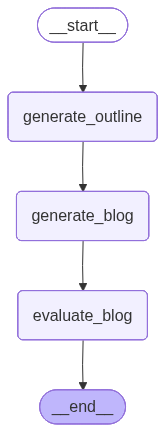

In [17]:
graph = StateGraph(BlogState)
# add nodes
graph.add_node("generate_outline", gen_outline)
graph.add_node("generate_blog", gen_blog)
graph.add_node("evaluate_blog", eval_blog)
# add edges
graph.add_edge(START, "generate_outline")
graph.add_edge("generate_outline", "generate_blog")
graph.add_edge("generate_blog", "evaluate_blog")
graph.add_edge("evaluate_blog", END)
# compile the graph
blog_writer = graph.compile()
blog_writer

In [18]:
initial_state = {"topic": "Growing trends of Anime in India."}
output_state = blog_writer.invoke(initial_state)
print(output_state)

{'topic': 'Growing trends of Anime in India.', 'outline': '**Title:** "The Rise of Anime in India: Understanding the Growing Trends and Culture"\n\n**I. Introduction**\n\n* Brief overview of anime and its global popularity\n* Importance of India as a growing anime market\n* Thesis statement: The anime trend is gaining momentum in India, driven by a younger generation and a desire for international entertainment.\n\n**II. Historically Speaking: Early Days of Anime in India**\n\n* Introduction to anime in India during the 1990s and early 2000s\n* Early adopters and pioneers who introduced anime to Indian audiences\n* Initial reception and challenges faced by anime enthusiasts in India\n\n**III. Current Trends and Statistics: The Rise of Anime in India**\n\n* Growing popularity of anime among Indian youth\n* Rising viewership on streaming platforms like Crunchyroll, Funimation, and Netflix\n* Top anime shows and series popular in India\n* Statistics on anime fan base growth and demographi

In [19]:
print(f"Title: {output_state['topic']}\n")
print(f"{output_state['blog']}")
print(f"\nBlog Score (out of 10): {output_state['score']}")

Title: Growing trends of Anime in India.

**The Rise of Anime in India: Understanding the Growing Trends and Culture**

**I. Introduction**

The world of anime has been captivating audiences globally for decades, and India is no exception. With its vibrant colors, engaging storylines, and memorable characters, anime has become a favorite among Indian youth. As the demand for international entertainment continues to grow, India has emerged as a significant market for anime. In this blog, we'll explore the growing trends of anime in India, its cultural significance, and the factors contributing to its popularity.

The anime trend is gaining momentum in India, driven by a younger generation and a desire for international entertainment. As a result, the anime industry is witnessing significant growth, with streaming platforms, anime conventions, and online communities springing up across the country. In this blog, we'll delve into the history of anime in India, its current trends and stati